## 1. Exploratory Data Analaysis

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [72]:
path = "./data/heart_failures_survivals.csv"
dataset = pd.read_csv(path)

In [73]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Data Description
- The hospital physician considered a patient having anaemia if haematocrit levels were lower than 36%.
- CPK refer to level of Enzymes in blood. High value of CPK indicates danger.
- Serum creatinine refer to level of creatinine in blood which shows that how’s your kidney works. High value of Serum creatinine indicates danger.
- Serum sodium refer to sodium level in blood. Low level of serum sodium indicates danger..
- Ejection fraction indicates that how much blood left ventricle is pumping out. Normal is between 50% and 70%.
- Platelets usually between 150,000 to 450,000
- Time is indicating the follow-up period from when the patient was in observation till last day.


### 1.1 Descriptive Statistics

In [74]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [75]:
dataset.nunique()

age                          46
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
gender                        2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Most of the describing variables does not play role in categorical features, so we just filter only continuous value features.

In [76]:
#[ all rows, continuous features & not categorical features ] 
continuous_features = dataset.loc[:, (dataset.nunique() > 2) & (dataset.nunique() != 2)]
continuous_features.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [77]:
features_list_continuous = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time' ]
features_list_categorical = ['anaemia', 'diabetes', 'high_blood_pressure', 'gender', 'smoking']

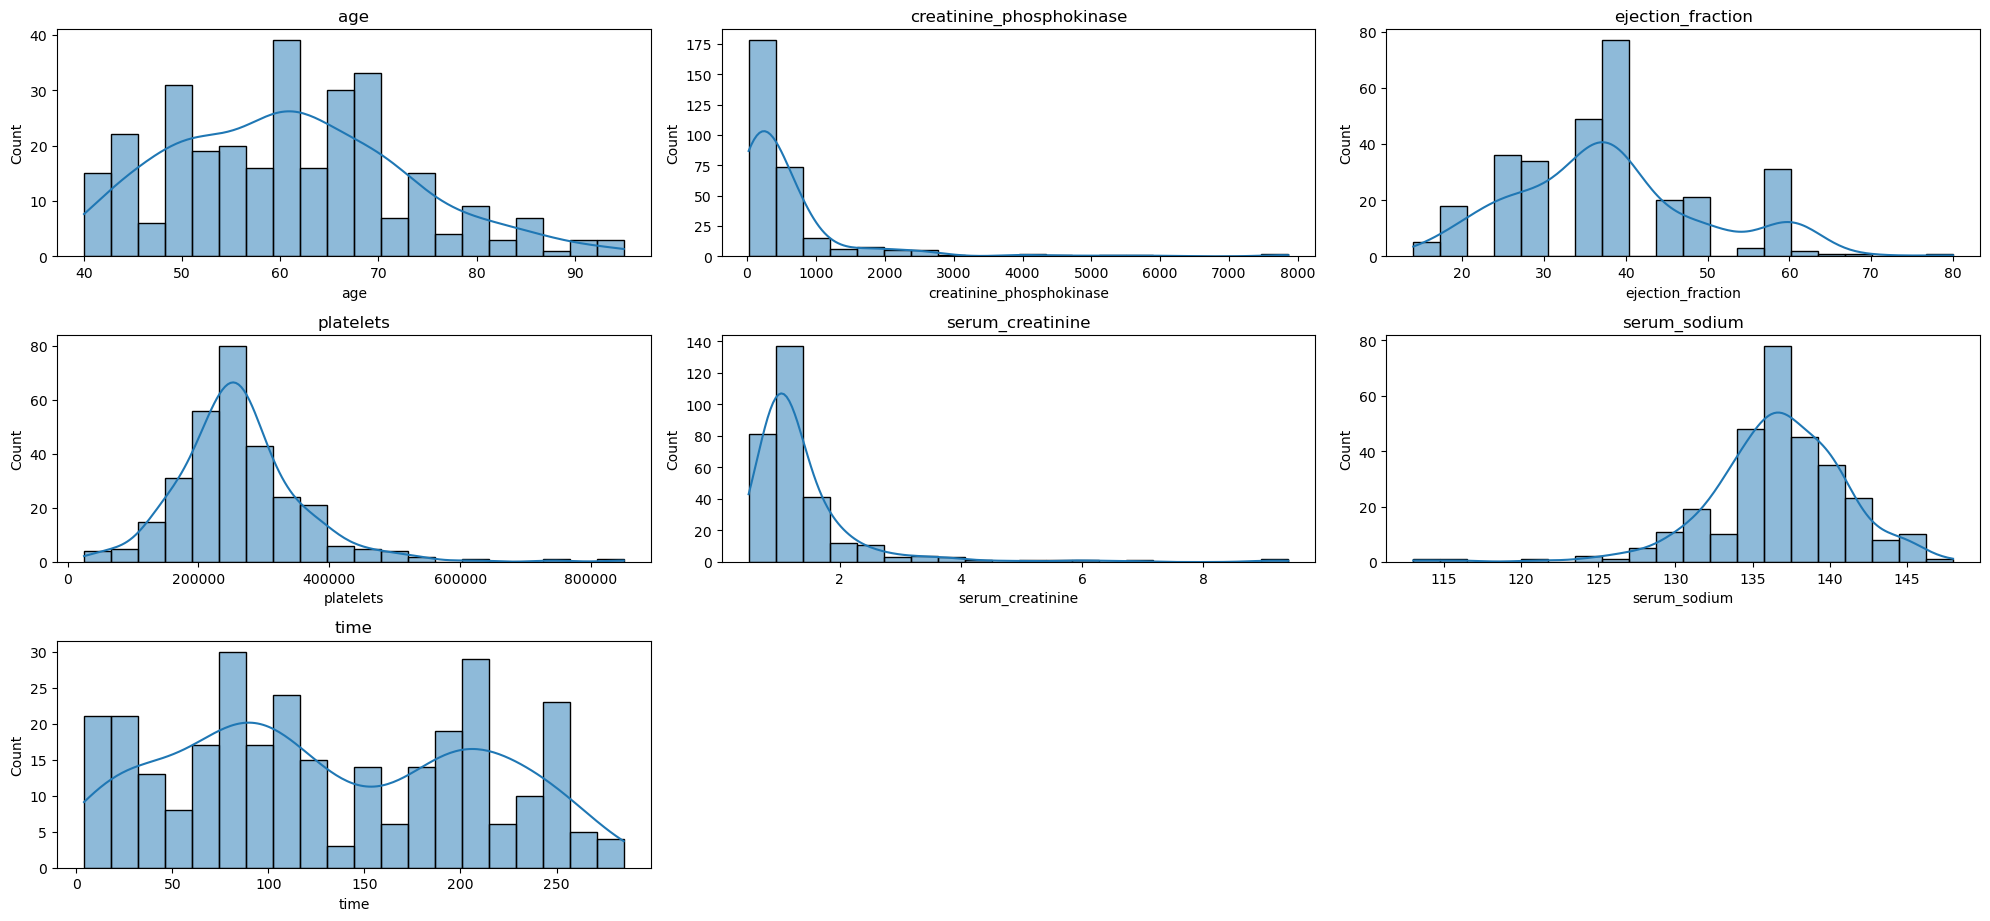

In [78]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_list_continuous, 1):
    
    plt.subplot(5, 3, i)  # Adjust the grid size according to the number of features
    sns.histplot(dataset[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   gender                    299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [80]:
#Checking missing values
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
gender                      0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Visualize Continuous Variables

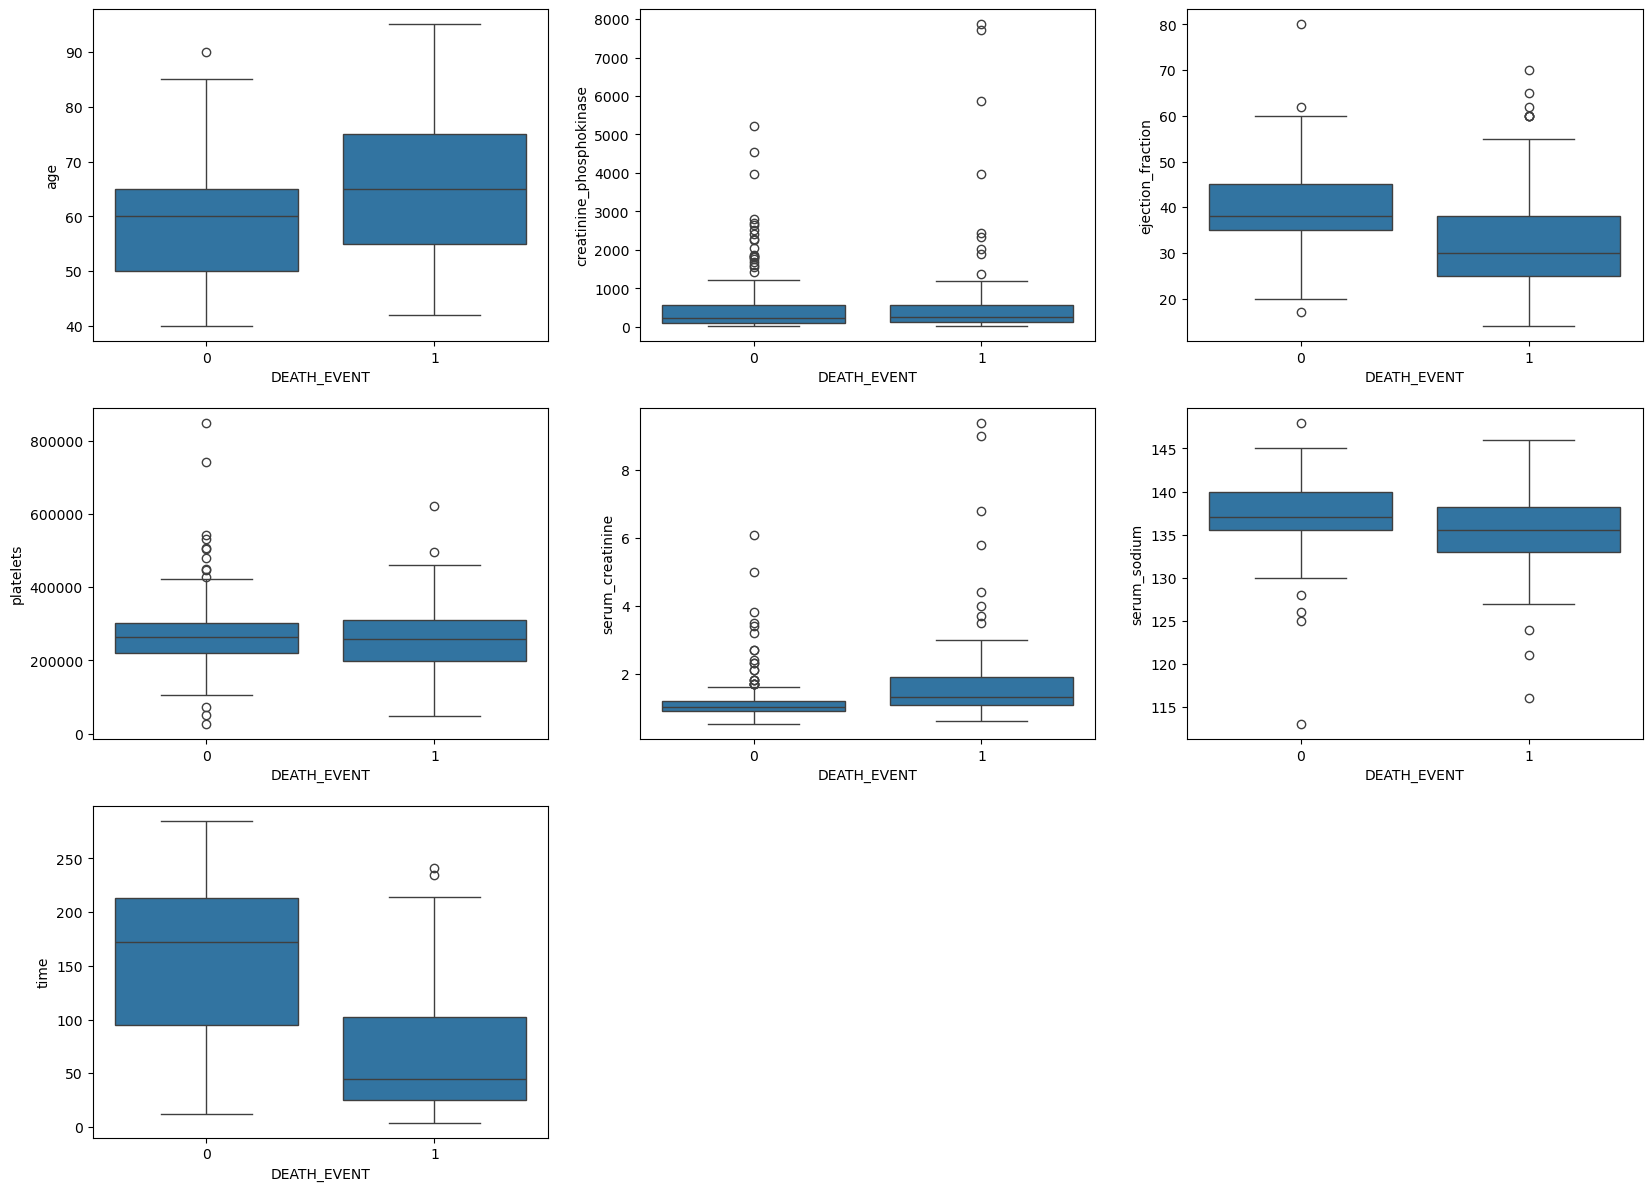

In [81]:
plt.figure(figsize=(20, 25))

for i, feature in enumerate(features_list_continuous, 1):
    plt.subplot(5,3, i)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=dataset)

#### Visualize Categorical Variables

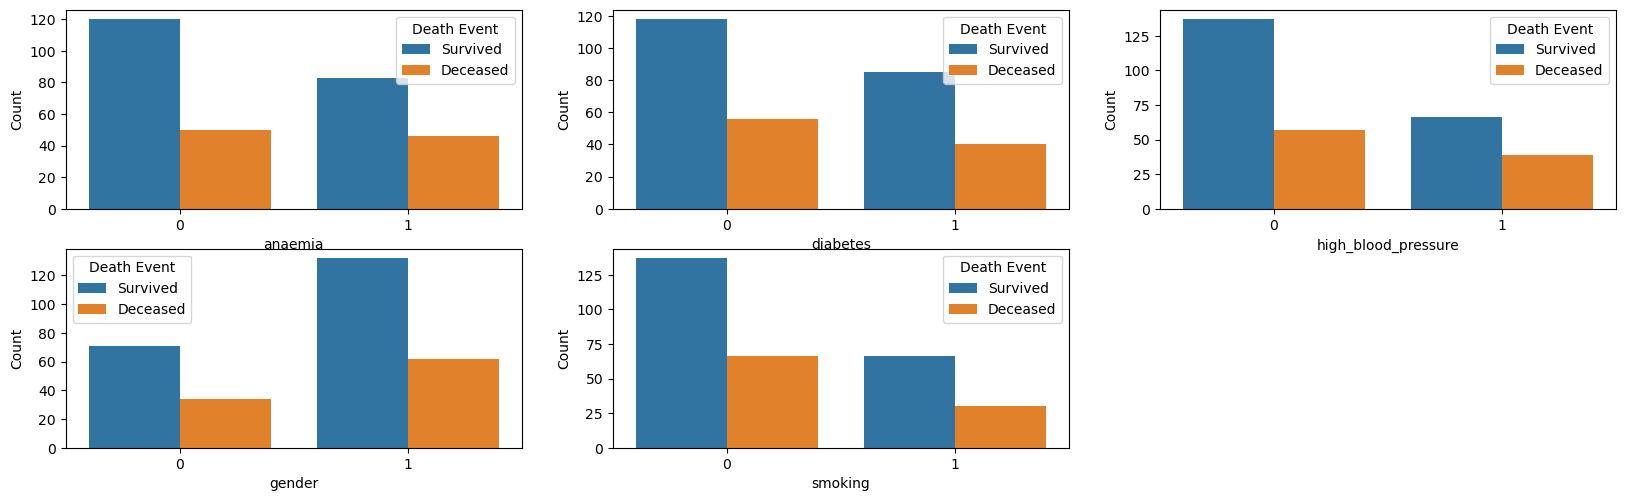

In [82]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(features_list_categorical, 1):
    plt.subplot(5,3,i)
    sns.countplot(x=feature, hue='DEATH_EVENT', data=dataset)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Death Event', labels=['Survived', 'Deceased'])
 

#### Check, features are normaly distributed or not

In [83]:
import pylab
import scipy.stats as stat

def plot_data(data):
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.subplot(1, 2, 2)
    stat.probplot(data, dist='norm', plot=pylab)
    plt.show()

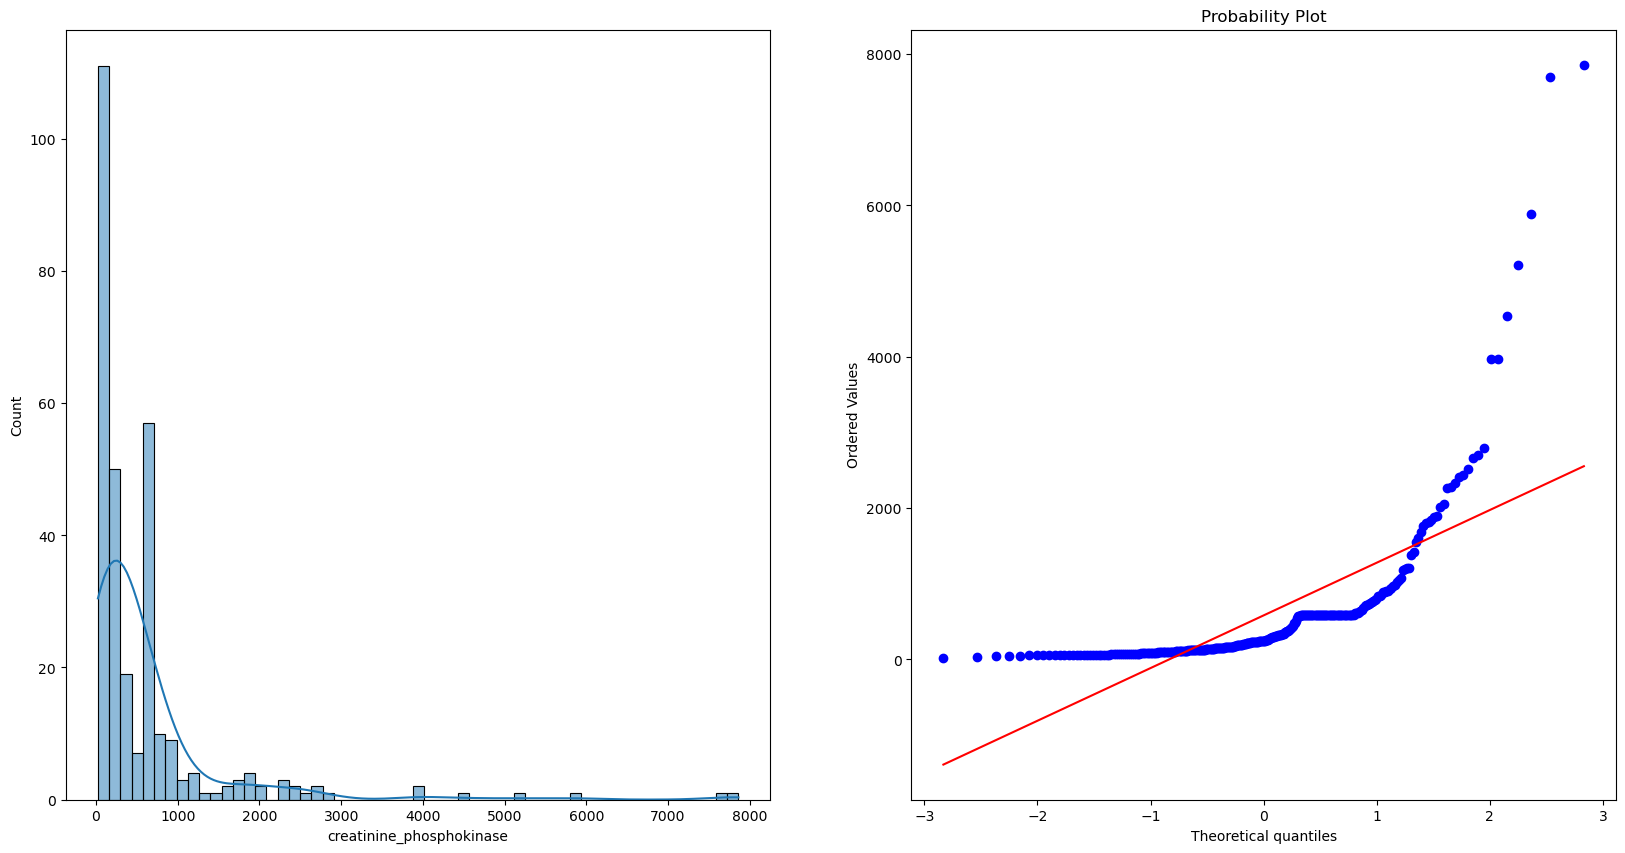

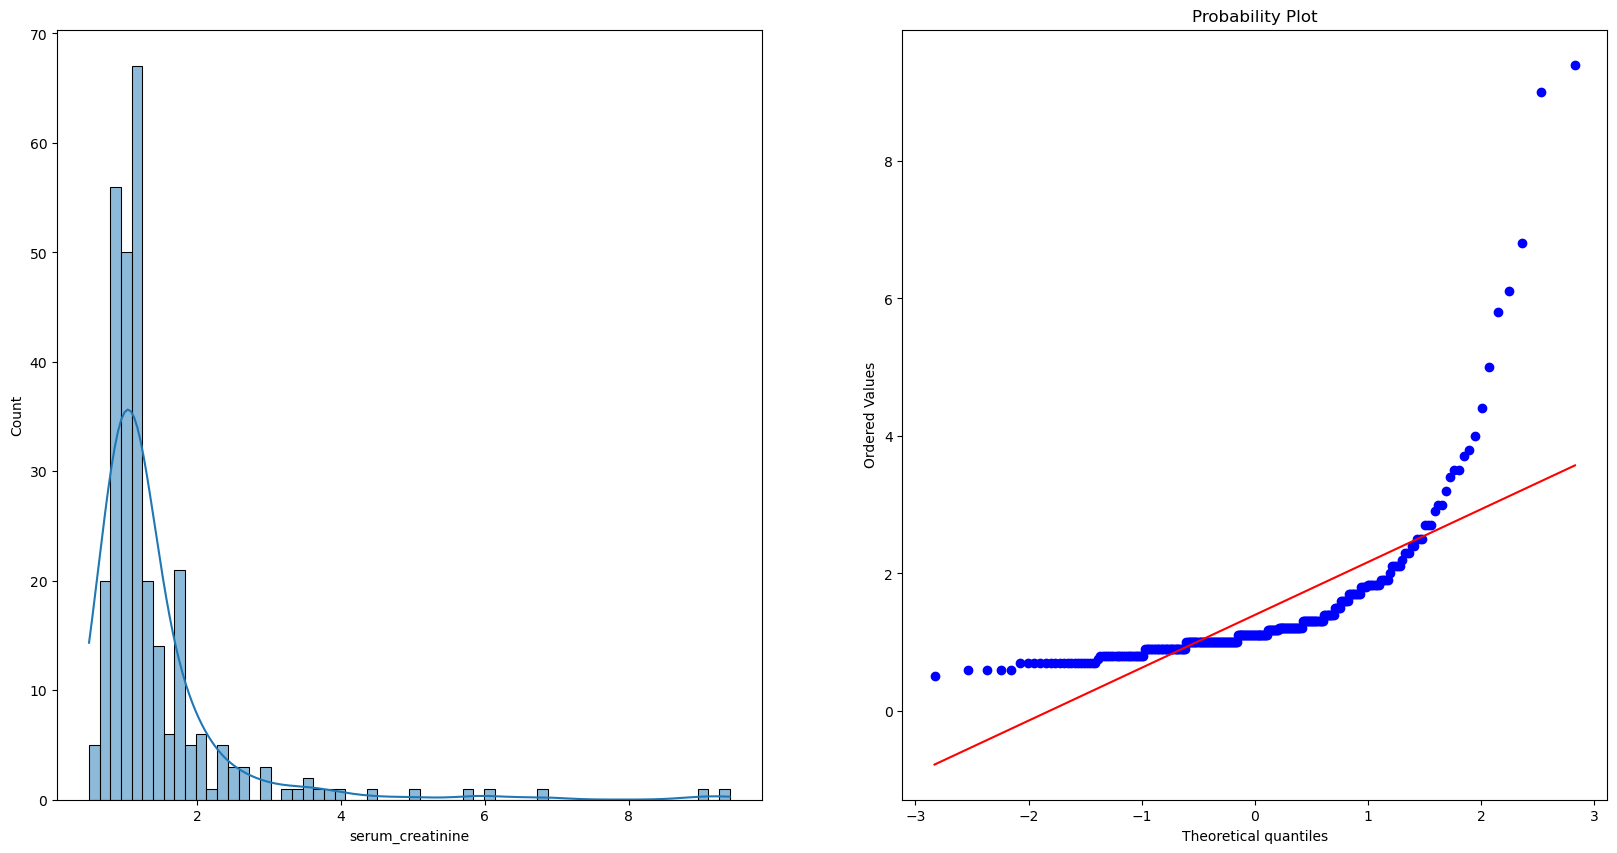

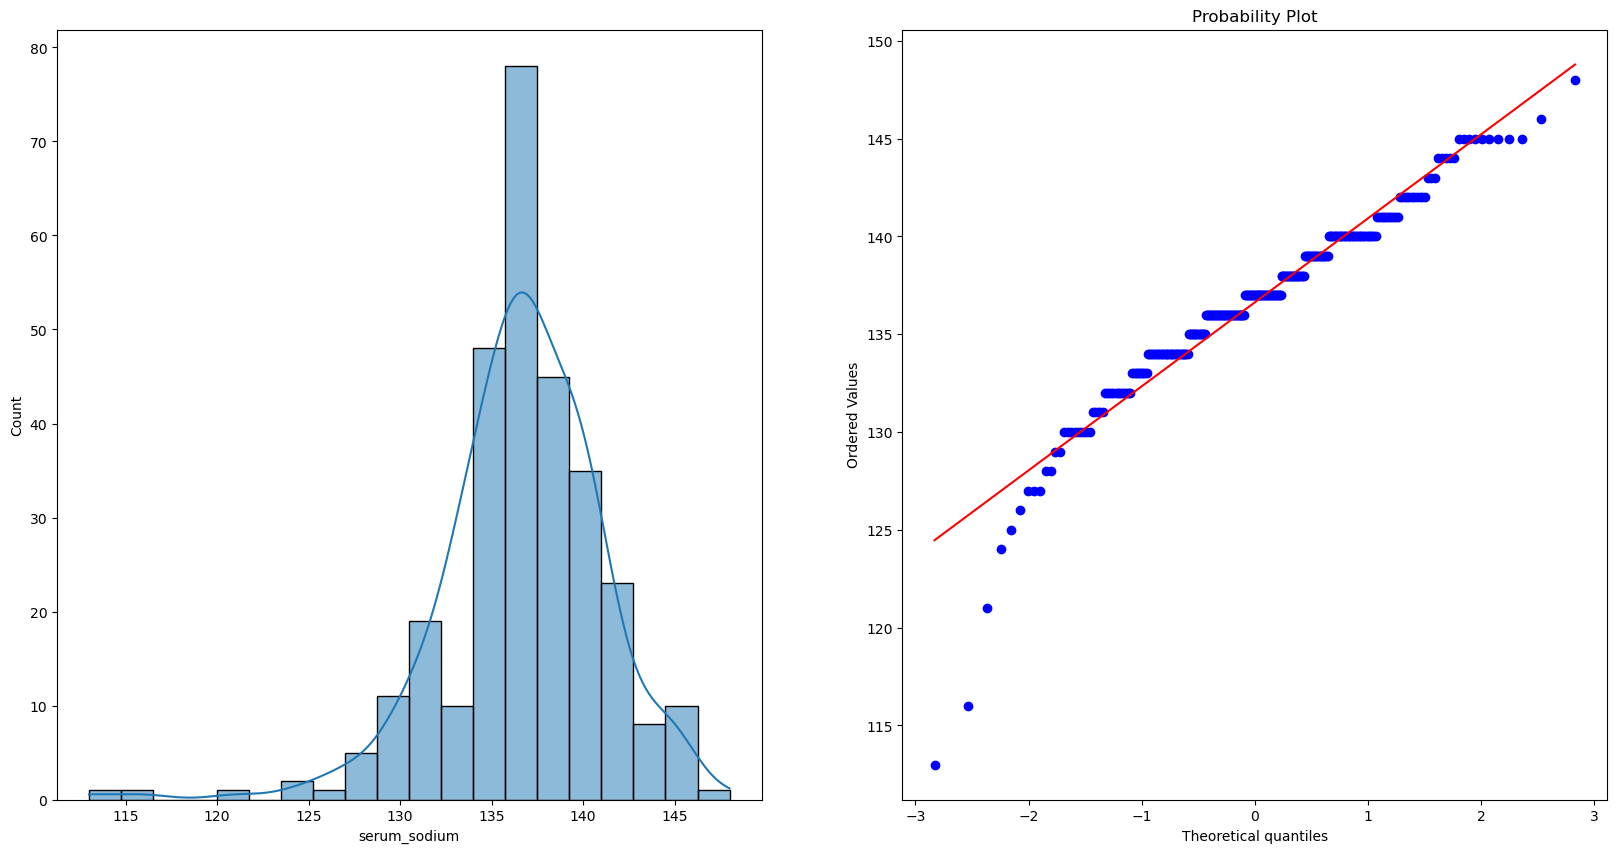

In [84]:
cpk = dataset['creatinine_phosphokinase']
plot_data(cpk)
sc = dataset['serum_creatinine']
plot_data(sc)
ss = dataset['serum_sodium']
plot_data(ss)

#### Convert Log Normal to Normal Distribution

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

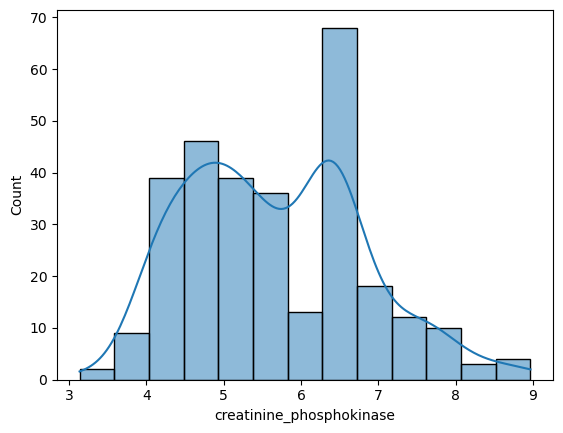

In [85]:
sns.histplot(np.log(cpk), kde=True)

<Axes: xlabel='serum_creatinine', ylabel='Count'>

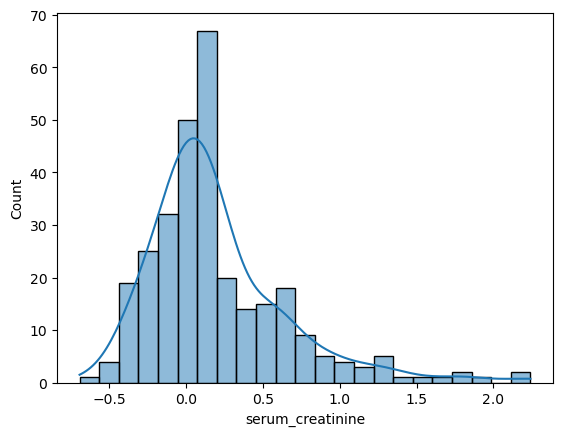

In [86]:
sns.histplot(np.log(sc), kde=True)

#### Apply log to the actual dataset

In [87]:
dataset['creatinine_phosphokinase'] = np.log(dataset['creatinine_phosphokinase'])
dataset['serum_creatinine'] = np.log(dataset['serum_creatinine'])

In [88]:
dataset.rename(columns={'creatinine_phosphokinase' : 'creatinine_phosphokinase_log'}, inplace=True)
dataset.rename(columns={'serum_creatinine' : 'serum_creatinine_log'}, inplace=True)

In [89]:
dataset.head()

,age,anaemia,creatinine_phosphokinase_log,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine_log,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75,0,6.366470,0,20,1,265000.00,0.641854,130,1,0,4,1
1,55,0,8.969669,0,38,0,263358.03,0.095310,136,1,0,6,1
2,65,0,4.983607,0,20,0,162000.00,0.262364,129,1,1,7,1
3,50,1,4.709530,0,20,0,210000.00,0.641854,137,1,0,7,1
4,65,1,5.075174,1,20,0,327000.00,0.993252,116,0,0,8,1


<Axes: xlabel='creatinine_phosphokinase_log', ylabel='Count'>

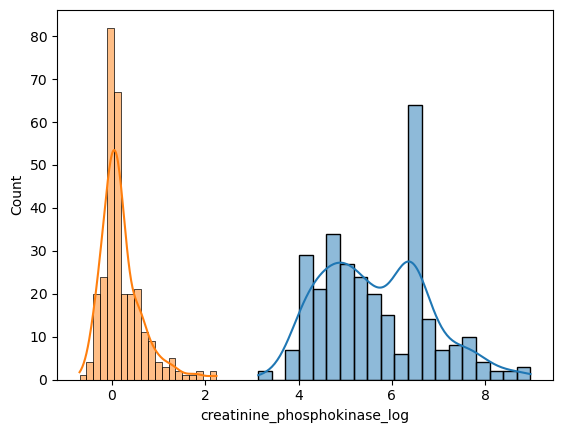

In [90]:
sns.histplot(dataset['creatinine_phosphokinase_log'], bins=20, kde=True)
sns.histplot(dataset['serum_creatinine_log'], bins=20, kde=True)

In [91]:
# Save the DataFrame to a new CSV file
dataset.to_csv('./data/heart_failure_survival_log.csv', index=False)

In [92]:
dataset2_features_list_continuous = ['age', 'creatinine_phosphokinase_log', 'ejection_fraction', 'platelets', 'serum_creatinine_log', 'serum_sodium', 'time' ]
dataset2_features_list_categorical = ['anaemia', 'diabetes', 'high_blood_pressure', 'gender', 'smoking']

### 1.2 Inferential Statistics

In [93]:
# Pearson coefficient correlation (-1 to 1)
dataset.corr()

,age,anaemia,creatinine_phosphokinase_log,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine_log,serum_sodium,gender,smoking,time,DEATH_EVENT
age,1.000000,0.087574,-0.096585,-0.101454,0.060195,0.093170,-0.052475,0.229093,-0.045912,0.065546,0.018926,-0.224265,0.253581
anaemia,0.087574,1.000000,-0.224115,-0.012729,0.031557,0.038182,-0.043786,0.018355,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase_log,-0.096585,-0.224115,1.000000,0.034560,-0.069127,-0.079908,0.021513,-0.068806,0.019036,0.030810,-0.025061,0.099370,0.032089
diabetes,-0.101454,-0.012729,0.034560,1.000000,-0.004850,-0.012732,0.092193,-0.025247,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060195,0.031557,-0.069127,-0.004850,1.000000,0.024445,0.072177,-0.099952,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093170,0.038182,-0.079908,-0.012732,0.024445,1.000000,0.049963,-0.053923,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052475,-0.043786,0.021513,0.092193,0.072177,0.049963,1.000000,-0.049329,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine_log,0.229093,0.018355,-0.068806,-0.025247,-0.099952,-0.053923,-0.049329,1.000000,-0.256708,0.030321,-0.038851,-0.170074,0.360301
serum_sodium,-0.045912,0.041882,0.019036,-0.089551,0.175902,0.037109,0.062125,-0.256708,1.000000,-0.027566,0.004813,0.087640,-0.195204
gender,0.065546,-0.094769,0.030810,-0.157730,-0.148386,-0.104615,-0.125120,0.030321,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [94]:
#sns.pairplot(dataset)

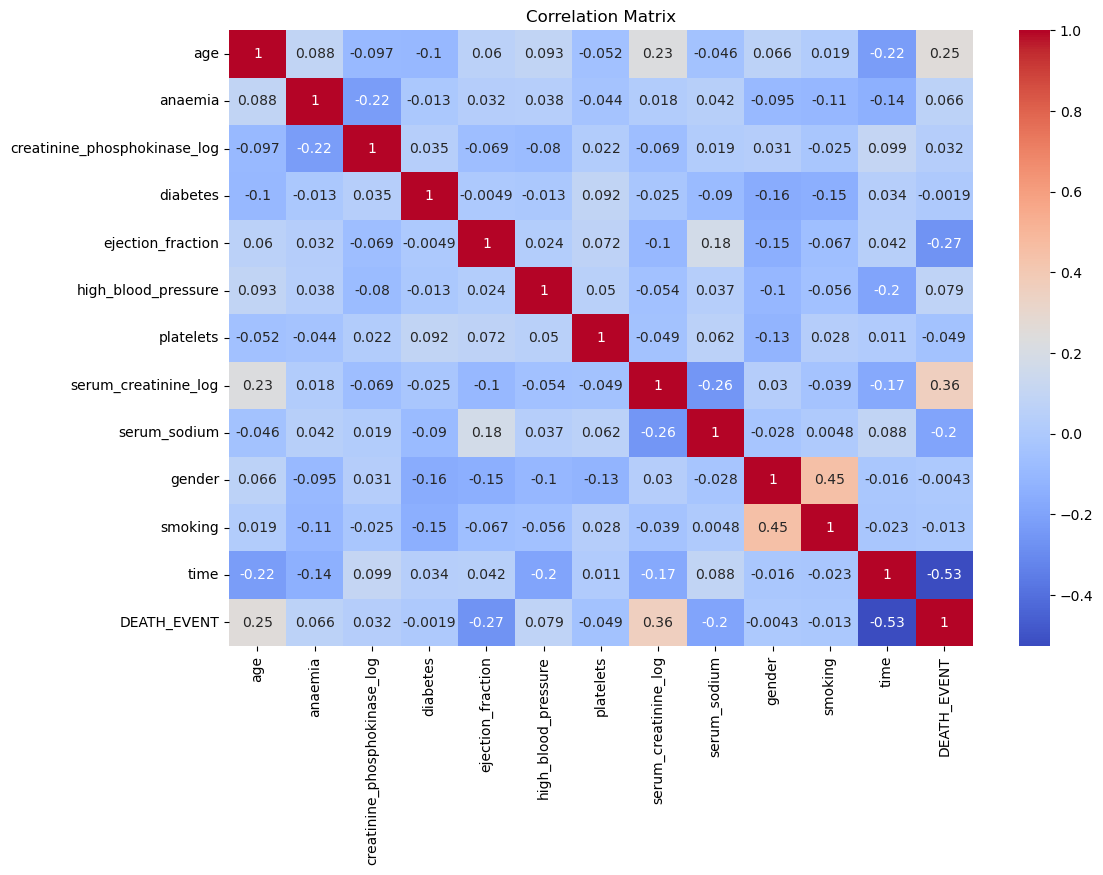

In [95]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Chi-Square Test between Categorical
Null hypothesis: There is no association between categorical variables death event.

Alternate hypothesis: There is association between continuous variables and death event.

In [96]:
from scipy.stats import chi2_contingency

In [97]:
for feature in dataset2_features_list_categorical:
    # Create a contingency table
    table = pd.crosstab(dataset[feature], dataset['DEATH_EVENT'])

    # Perform the Chi-Square test
    chi2, p, dof, expected = chi2_contingency(table)

    # p is the p-value
    print(f"P-value between {feature} & Death Event: {p}")


P-value between anaemia & Death Event: 0.3073160508415107
P-value between diabetes & Death Event: 1.0
P-value between high_blood_pressure & Death Event: 0.21410341199416902
P-value between gender & Death Event: 1.0
P-value between smoking & Death Event: 0.9317652998235507


#### Point-Biserial Correlation Coefficient between Continuous & Categorical

In [98]:
from scipy.stats import pointbiserialr

for i, feature in enumerate(dataset2_features_list_continuous, 1):

    correlation, p_value = pointbiserialr(dataset[feature], dataset['DEATH_EVENT'])
    print(f"Point-Biserial Correlation for {feature}: {correlation}, P-value: {p_value}")

Point-Biserial Correlation for age: 0.2535805588349361, P-value: 9.028460014263927e-06
Point-Biserial Correlation for creatinine_phosphokinase_log: 0.032089249545426704, P-value: 0.580473530743756
Point-Biserial Correlation for ejection_fraction: -0.2686033123940619, P-value: 2.4528974182087856e-06
Point-Biserial Correlation for platelets: -0.04913886798037428, P-value: 0.39719415404136527
Point-Biserial Correlation for serum_creatinine_log: 0.3603005363341854, P-value: 1.353621515941199e-10
Point-Biserial Correlation for serum_sodium: -0.19520359641640117, P-value: 0.0006889112363763596
Point-Biserial Correlation for time: -0.526963779277577, P-value: 9.12222338492643e-23


If P-value is > 0.05, So we should not reject null hypothesis.

and if P-value is < 0.05, So we should reject null hypothesis.

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

#### Feature Selction

Based on above test we select the following features:

<ul>
    <li>Age</li>
    <li>Ejection fraction</li>
    <li>Serum creatinine</li>
    <li>Serum sodium</li>
    <li>time</li>
</ul>

In [99]:
dataset.drop(columns=['anaemia'], inplace=True)
dataset.drop(columns=['creatinine_phosphokinase_log'], inplace=True)
dataset.drop(columns=['platelets'], inplace=True)
dataset.drop(columns=['diabetes'], inplace=True)
dataset.drop(columns=['high_blood_pressure'], inplace=True)
dataset.drop(columns=['smoking'], inplace=True)
dataset.drop(columns=['gender'], inplace=True)

In [100]:
dataset.to_csv('./data/heart_failure_survival_selected_features.csv', index=False)

## 2. Model Development

### 2.1 Data Preparation

In [101]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [102]:
dataset.head()

,age,ejection_fraction,serum_creatinine_log,serum_sodium,time,DEATH_EVENT
0,75,20,0.641854,130,4,1
1,55,38,0.095310,136,6,1
2,65,20,0.262364,129,7,1
3,50,20,0.641854,137,7,1
4,65,20,0.993252,116,8,1


In [103]:
print(X.shape)
print(Y.shape)

(299, 5)
(299,)


In [104]:
# Dimension change to 2-D
Y = np.expand_dims(Y, axis=1)

In [105]:
Y.shape

(299, 1)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_, Y_train, Y_ = train_test_split(X, Y, test_size=0.3, random_state=123)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_, Y_, test_size=0.5, random_state=123)
del X_, Y_

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cv)
X_test_scaled = scaler.transform(X_test)

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [171]:
def build_models():

    
    model_1 = Sequential(
    [
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='linear')
    ],
        name='model_1'
    )
    
    model_2 = Sequential(
    [
        Dense(20, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='linear')
    ],
        name='model_2'
    )

    model_3 = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ],
        name='model_3'
    )
    
    model_4 = Sequential(
    [
        Dense(30, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='linear')
    ],
        name='model_4'
    )

    model_5 = Sequential(
    [
        Dense(35, activation='relu'),
        Dense(25, activation='relu'),
        Dense(20, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ],
        name='model_5'
    )
    
    model_list = [model_1, model_2, model_3, model_4, model_5]
    
    return model_list

In [172]:
models = build_models()
NN_train_error = []
NN_cv_error = []

for model in models:
    
    tf.random.set_seed(1234)
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    )
    
    print(f"Training {model.name}...")


    
    model.fit(
        X_train_scaled, Y_train,
        epochs=200,
        verbose=0
    
    )
    
    print("Done!\n")
    
    threshold = 0.5
    # Misclassified error of Training data
    Y_hat = model.predict(X_train_scaled)
    Y_hat = tf.math.sigmoid(Y_hat)
    Y_hat = np.where(Y_hat >= threshold, 1, 0)
    train_error = np.mean(Y_hat != Y_train)
    NN_train_error.append(train_error)
    
    # Misclassified error of CV data
    Y_hat = model.predict(X_cv_scaled)
    Y_hat = tf.math.sigmoid(Y_hat)
    Y_hat = np.where(Y_hat >= threshold, 1, 0)
        
    cv_error = np.mean(Y_hat != Y_cv)
    NN_cv_error.append(cv_error)
    
# Print the results
for model_num in range(len(NN_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {NN_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {NN_cv_error[model_num]:.5f}"
        )


Training model_1...
Done!

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training model_2...
Done!

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training model_3...
Done!

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Training model_4...
Done!

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Training model_5...
Done!

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model 1: Training Set Classification Error: 0.01435, CV Set Classification Error: 0.22222
Model 2: Training Set Classification Error: 0.00000, CV Set Classification Error: 0.20000
Model 3: Training Set Classification Error: 0.00000, CV Set Classification Error: 0.20000
Model 4: Training Set Classification Error: 0.00000, CV Set Classification Error: 0.15556
Model 5: Training Set Classification Error: 0.00000, CV Set Classification Error: 0.24444


In [173]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [174]:
for i, model in enumerate(models, start=1):
    Y_pred = model.predict(X_cv_scaled)
    Y_pred = tf.math.sigmoid(Y_pred)
    Y_pred = np.where(Y_pred >= 0.5, 1, 0)
    
    # Confusion matrix
    cm = confusion_matrix(Y_cv, Y_pred)
    print(f"Model {i} Confusion Matrix:\n{cm}\n")
    
    # Precision
    precision = precision_score(Y_cv, Y_pred)
    print(f"Model {i} Precision: {precision:.5f}\n")
    
    # Recall
    recall = recall_score(Y_cv, Y_pred)
    print(f"Model {i} Recall: {recall:.5f}\n")
    
    # F1 score
    f1 = f1_score(Y_cv, Y_pred)
    print(f"Model {i} F1 Score: {f1:.5f}\n")
    
  

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model 1 Confusion Matrix:
[[25  4]
 [ 6 10]]

Model 1 Precision: 0.71429

Model 1 Recall: 0.62500

Model 1 F1 Score: 0.66667

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model 2 Confusion Matrix:
[[25  4]
 [ 5 11]]

Model 2 Precision: 0.73333

Model 2 Recall: 0.68750

Model 2 F1 Score: 0.70968

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model 3 Confusion Matrix:
[[26  3]
 [ 6 10]]

Model 3 Precision: 0.76923

Model 3 Recall: 0.62500

Model 3 F1 Score: 0.68966

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Model 4 Confusion Matrix:
[[26  3]
 [ 4 12]]

Model 4 Precision: 0.80000

Model 4 Recall: 0.75000

Model 4 F1 Score: 0.77419

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Model 5 Confusion Matrix:
[[25  4]
 [ 7  9]]

Model 5 Precision: 0.69231

Model 5 Recall: 0.56250

Model 5 F1 Score: 0.62069



It appears that Model 4 performs well, exhibiting both a low cross-validation error and a high F1 score compared to the others.

In [175]:
models

[<Sequential name=model_1, built=True>,
 <Sequential name=model_2, built=True>,
 <Sequential name=model_3, built=True>,
 <Sequential name=model_4, built=True>,
 <Sequential name=model_5, built=True>]

In [177]:
models[3].summary()
models[3].get_weights()

Model: "model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_429 (Dense)                    │ (None, 30)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_430 (Dense)                    │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_431 (Dense)                    │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_432 (Dense)                    │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_433 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,600 (10.16 KB)

 Trainable params: 866 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,734 (6.78 KB)

[array([[ 0.2627717 , -0.5317819 , -0.56129295, -0.14639546, -0.41453186,
          0.84483814, -0.28281522,  0.760515  ,  0.32281756, -0.99659854,
          0.44856772, -0.22873715, -0.25260144, -0.76869726,  0.7110835 ,
         -0.31365868,  0.2136323 ,  0.2392469 ,  0.28017676, -0.04285182,
          0.4879217 ,  0.21619469,  0.46186724, -0.30906728,  0.756971  ,
          0.3398783 ,  0.08095825,  0.37757316, -0.2637826 , -0.30861402],
        [ 0.07992995,  0.4889826 , -0.19673595, -0.7365132 ,  0.3815148 ,
         -0.1281625 ,  0.9198737 , -0.00770389,  0.41533583,  0.26954237,
          0.19309947,  0.5482029 ,  0.8864757 , -0.08387132, -0.42815337,
          0.32434744,  0.2968092 , -0.21347556, -0.78236604,  0.68754566,
          0.17018858,  0.40378588,  0.54133165, -0.5734055 , -0.68021345,
          0.10947339,  0.6816419 ,  0.30282125, -0.580581  ,  0.47622615],
        [ 0.51437837, -0.60644776,  0.15627536,  0.5801924 , -0.5503028 ,
         -0.21537217,  0.18044527, -

In [179]:
best_model = models[3]

In [221]:
new_data = X_test

# Predicting with the best model
predictions_logits = best_model.predict(new_data_scaled)
predictions_probs = tf.math.sigmoid(predictions_logits)
predictions = np.where(predictions_probs >= 0.5, 1, 0)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, predictions)

print(f"Model Accuracy: {accuracy:.5f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Model Accuracy: 0.82222


In [222]:
predictions

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]])

##### Save & Load model

In [238]:
best_model.save('Model_4.keras')

In [239]:
from tensorflow.keras.models import load_model

loaded_model = load_model('Model_4.keras')

## 3. Model Deployment

In [240]:
import pickle

In [241]:
pickle.dump(best_model, open('NN_Model.pkl', 'wb'))

In [242]:
pickled_model = pickle.load(open('NN_Model.pkl', 'rb'))

In [243]:
new_data = X_test_scaled[1].reshape(1, -1)

pickled_model_pred = pickled_model.predict(new_data)
predictions_probs = tf.math.sigmoid(pickled_model_pred)
predictions = np.where(predictions_probs >= 0.5, 1, 0)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
[[1]]


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag